#  Back-propogation - chain rule

Use chain rule and gradient descent to update weights for a simple neural network. It contains one hidden layer along with input and output layers.

https://harvard-iacs.github.io/2020-CS109A/lectures/lecture31/notebook/

<img src="./images/backpropogation.png" style="width: 600px;" >
<img src="./images/backpropogation_derivative.png" style="width: 600px;" >

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

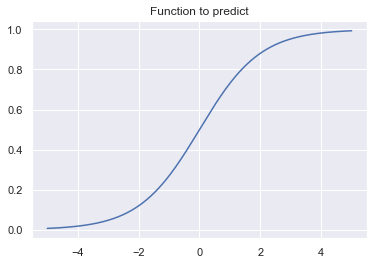

In [15]:
df = pd.read_csv('./data/backprop.csv')
x = df['x'].values.reshape(-1,1)
y = df['y'].values

plt.plot(x,y)
plt.title("Function to predict");

In [52]:
# Design simple neural network

def neural_network(W, x):
    ''' 
    W is a list of two weights (w1, w2)
    x is the input to the neural network  '''
    
    a1 = np.dot(x, W[0])   # first affine
    h1 = np.sin(a1)        # fisrt activation
    a2 = np.dot(h1, W[1])  # second affine
    y = np.sin(a2)         # second activation
    
    return a1, a2, y


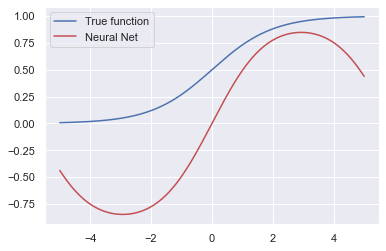

In [161]:
# Initialize the weights, but keep the random seed as 310 for reproducable results

np.random.seed(310)
W = [np.random.randn(1,1), np.random.randn(1, 1)]

plt.plot(x, y, label = 'True function')
plt.plot(x, neural_network(W,x)[2], label = 'Neural Net', color = 'r')
plt.legend();


### Update the weights using gradients

In [159]:
'''
Calculate dL/dw2 = dL/dy * dy/da2 * da2/dw2
dL/dy = 2*(ypred - y)
dy/da2 = -cos(a2)
da2/dw2 = sin(a1)

Calculate dL/dw1 = dL/dy * dy/da2 * da2/dh1 * dh1/da1 * da1/dw1
dL/dy = 2*(ypred - y)
dy/da2 = -cos(a2)
da2/dh1 = w2
dh1/da1 = -cos(a1)
da1/dw1 = x

'''

def dldw(W, x, y_pred, y, a1, a2):
    
    dldw1 = 2*(y_pred - y) *(-np.cos(a2)) * W[1] * (-np.cos(a1)) * x
    dldw2 = 2*(y_pred - y) *(-np.cos(a2)) * np.sin(a1)
    
    return [np.mean(dldw1), np.mean(dldw2)]



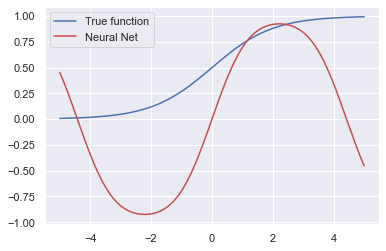

In [162]:
learning_rate = .001

for i in range(300):
    # Get the predicted response, and the two activations of the network
    a1, a2, y_pred = neural_network(W,x)

    # Get the derivatives and then update the Ws
    dldw1 = dldw(W,x, y_pred, y, a1, a2)[0]
    dldw2 = dldw(W,x, y_pred, y, a1, a2)[1]

    W[0] = W[0] - learning_rate * dldw1
    W[1] = W[1] - learning_rate * dldw2

plt.plot(x, y, label = 'True function')
plt.plot(x, neural_network(W,x)[2], label = 'Neural Net', color = 'r')
plt.legend();